In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
df = pd.read_csv('data/diabetes.csv')

In [ ]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print("Distribusi Sebelum SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("Distribusi Setelah SMOTE:", Counter(y_train_sm))

Distribusi Sebelum SMOTE: Counter({0: 350, 1: 187})
Distribusi Setelah SMOTE: Counter({1: 350, 0: 350})


In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {accuracy * 100:.2f}%")


Akurasi: 77.06%


In [ ]:
report = classification_report(y_test, y_pred, target_names=["Negatif", "Positif"], output_dict=True)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Negatif", "Positif"]))


Classification Report:
               precision    recall  f1-score   support

     Negatif       0.87      0.76      0.81       150
     Positif       0.64      0.79      0.71        81

    accuracy                           0.77       231
   macro avg       0.76      0.78      0.76       231
weighted avg       0.79      0.77      0.77       231



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[114  36]
 [ 17  64]]


In [ ]:
report_df = pd.DataFrame(report).transpose()
report_df = report_df.loc[["Negatif", "Positif"]]

<Figure size 800x500 with 0 Axes>

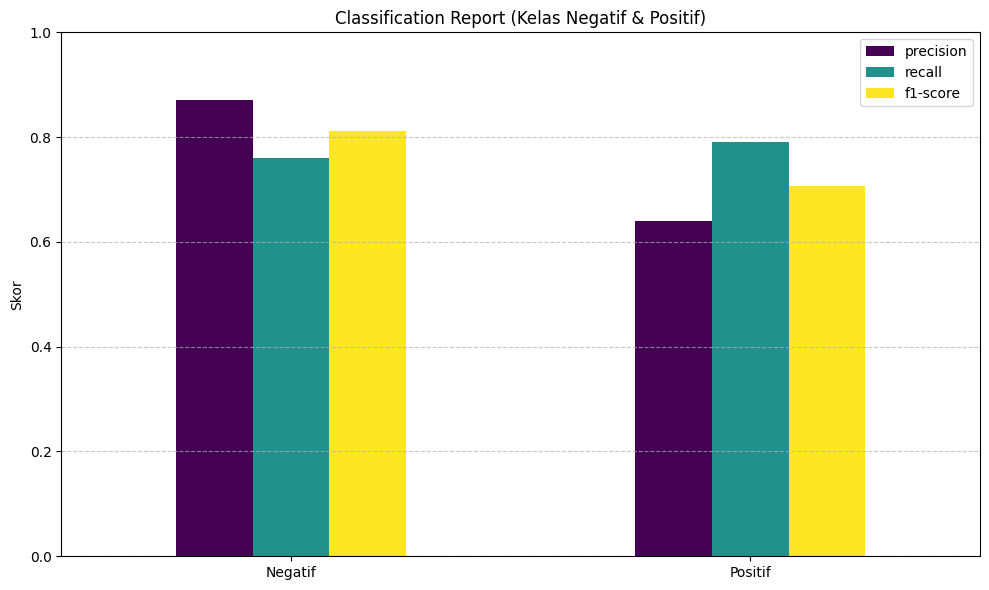

In [15]:
plt.figure(figsize=(8, 5))
report_df[["precision", "recall", "f1-score"]].plot(kind="bar", figsize=(10, 6), colormap='viridis')
plt.title("Classification Report (Kelas Negatif & Positif)")
plt.ylim(0, 1)
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

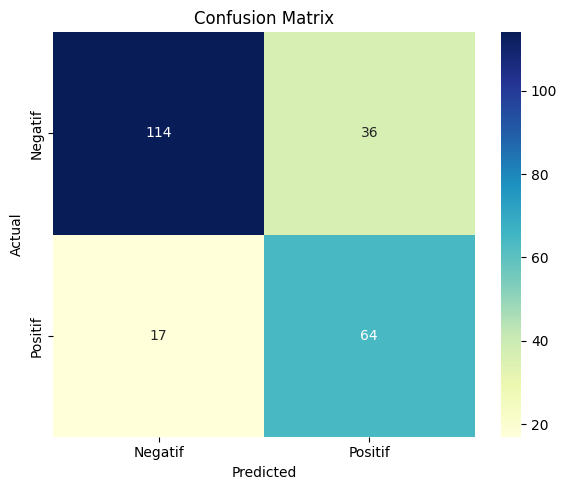

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=["Negatif", "Positif"], yticklabels=["Negatif", "Positif"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()